Portfolio Assignment 2 – Introduction to Cultural Data Science

In [ ]:
Part 1. 
Load the 'divorce_margarine' dataset from the 'dslabs' package. Investigate the correlation 
between margarine consumption and divorce rates in Maine. Would an increase in the 
preference for margarine lead to skyrocketing divorce rates?

In [2]:
install.packages('dplyr')
install.packages('ggplot2')
install.packages('dslabs')

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [3]:
library(dslabs)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
data('divorce_margarine')

In [4]:
head(divorce_margarine)

,divorce_rate_maine,margarine_consumption_per_capita,year
,<dbl>,<dbl>,<int>
1,5.0,8.2,2000
2,4.7,7.0,2001
3,4.6,6.5,2002
4,4.4,5.3,2003
5,4.3,5.2,2004
6,4.1,4.0,2005


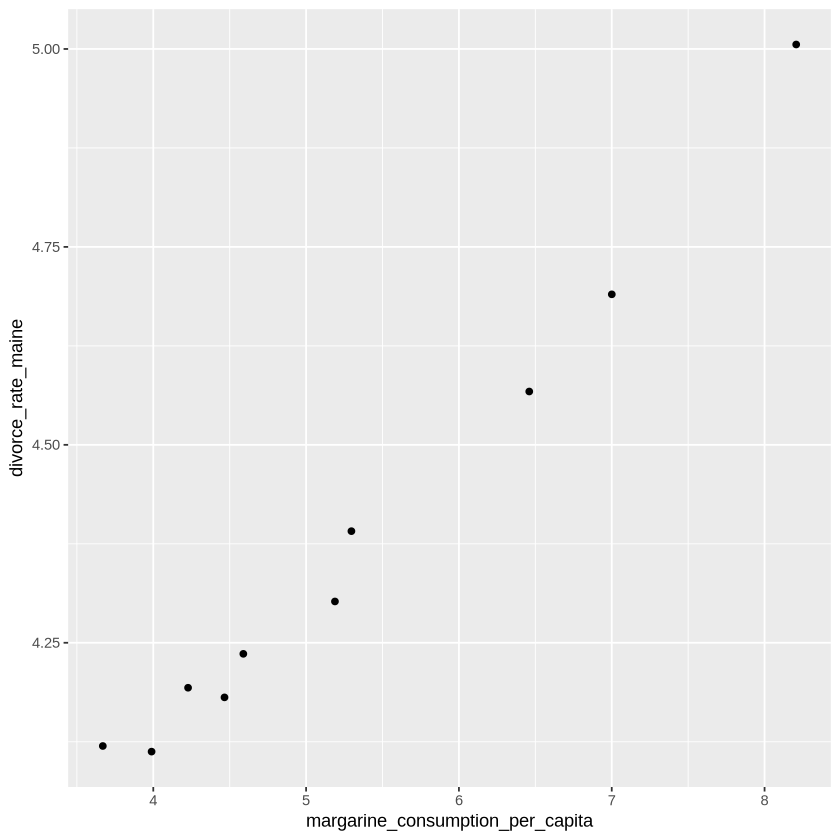

In [5]:
ggplot(divorce_margarine,
       aes(x=margarine_consumption_per_capita,
           y=divorce_rate_maine)) + 
    geom_point(position= 'jitter')

In [6]:
summary(lm(divorce_rate_maine ~ margarine_consumption_per_capita, data = divorce_margarine))


Call:
lm(formula = divorce_rate_maine ~ margarine_consumption_per_capita, 
    data = divorce_margarine)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05583 -0.01816 -0.01452  0.03601  0.04625 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      3.308626   0.048032   68.88 2.20e-12 ***
margarine_consumption_per_capita 0.201386   0.008735   23.05 1.33e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03841 on 8 degrees of freedom
Multiple R-squared:  0.9852,	Adjusted R-squared:  0.9833 
F-statistic: 531.5 on 1 and 8 DF,  p-value: 1.33e-08


Analyzing data: The very high F-statistic (531.5) and the low p-value (1.33e-08) shows a statistically significant relationship between divorce rates in Maine and margarine consumption (the two variables correlate). This means there is a very low probability of observing an F-statistic this high (531.5) if the null hypothesis (stating: no relationship between the variables) were true. In other words, the observed data provides strong evidence against the null hypothesis, indicating that margarine consumption is statistically significantly related to divorce rate.

Would an increase in the preference for margarine lead to skyrocketing divorce rates?
Despite the correlation between margarine consumption and divorce rates in Maine, the increase in the preference for margarine would NOT lead to an increase in divorce rates, exemplifying that “correlation does not imply causation” because the two variables are not causally related but are coincidentally correlated. 

Part 2: 
1. Is a person’s score on the vocabulary test (‘vocab’) significantly impacted by their level of 
education (‘educ’)? Visualize the relationship in a plot and build a model. Briefly explain the 
results. 

2. Whether a person is the native of an English-speaking country (‘nativeBorn’) could potentially 
have an impact on the size of their vocabulary. Visualize the relationship and add the predictor 
to the model. Briefly explain the results. 

3. Does a person’s level of education depend on whether they are a native of the country? 
Visualize the relationship. Do you think it makes sense to add the relationship as an interaction 
term? Try creating the model and briefly explain the results. 
Which model performs best? 
Keeping in mind that: Over the course of this exercise, you are trying to build a series of more and more complex models. So, the outcome variable always stays the same ('vocab'), you are just adding more and more predictors.

In [4]:
load('GSSvocab.RData')

In [5]:
str(GSSvocab)

'data.frame':	28867 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...


Filter for the year 1978 and remove rows with missing values (the function na.exclude() is one 
way to do this – check out the documentation!). 
Is a person’s score on the vocabulary test (‘vocab’) significantly impacted by their level of 
education (‘educ’)? Visualize the relationship in a plot and build a model. Briefly explain the 
results.

In [6]:
head(GSSvocab)

,year,gender,nativeBorn,ageGroup,educGroup,vocab,age,educ
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1978.1,1978,female,yes,50-59,12 yrs,10,52,12
1978.2,1978,female,yes,60+,<12 yrs,6,74,9
1978.3,1978,male,yes,30-39,<12 yrs,4,35,10
1978.4,1978,female,yes,50-59,12 yrs,9,50,12
1978.5,1978,female,yes,40-49,12 yrs,6,41,12
1978.6,1978,male,yes,18-29,12 yrs,6,19,12


In [5]:
data78 <- GSSvocab %>%
     filter(year == 1978) %>%
     na.exclude()
str(data78)

'data.frame':	1477 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...
 - attr(*, "na.action")= 'exclude' Named int [1:55] 179 193 258 329 346 389 390 408 429 451 ...
  ..- attr(*, "names")= chr [1:55] "1978.179" "1978.193" "1978.258" "1978.329" ...


`geom_smooth()` using formula = 'y ~ x'


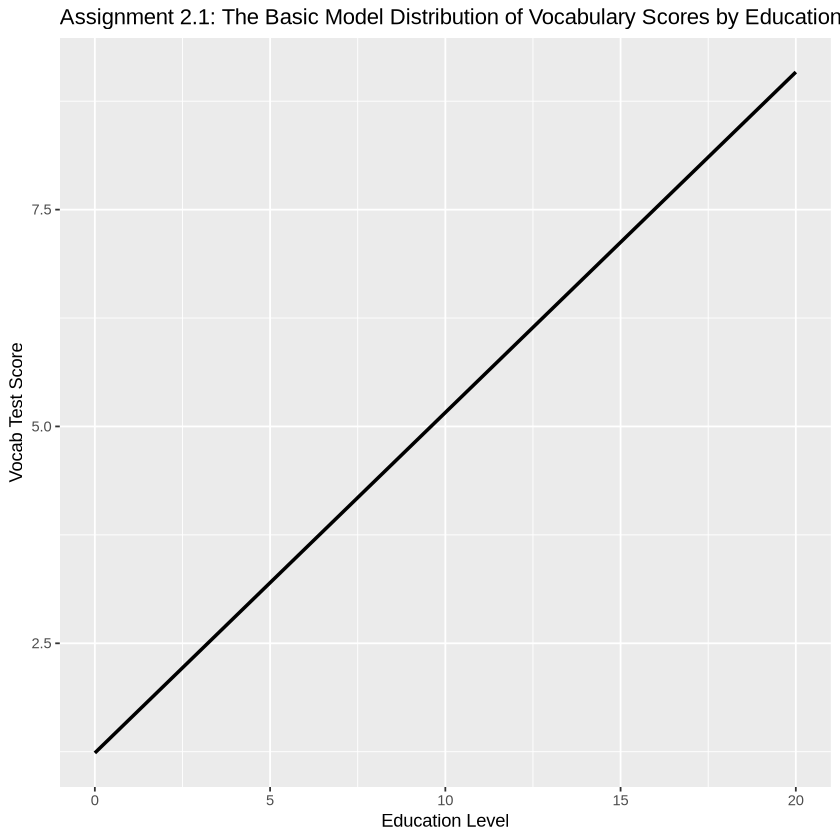

In [6]:
ggplot(data78,
       aes(x=educ,
           y=vocab)) +
 geom_smooth(method = "lm", color = "black", se = FALSE) +
 labs(title = "Assignment 2.1: The Basic Model Distribution of Vocabulary Scores by Education level",
  x = "Education Level",
  y = "Vocab Test Score"
) 

In [7]:
summary(lm(vocab ~ educ, data = data78))


Call:
lm(formula = vocab ~ educ, data = data78)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1233 -1.1608  0.0542  1.0917  5.6243 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.23567    0.19957   6.192  7.7e-10 ***
educ         0.39251    0.01606  24.443  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.885 on 1475 degrees of freedom
Multiple R-squared:  0.2883,	Adjusted R-squared:  0.2878 
F-statistic: 597.5 on 1 and 1475 DF,  p-value: < 2.2e-16


ANSWER: 1. Is a person’s score on the vocabulary test (‘vocab’) significantly impacted by their level of education (‘educ’)?

Short answer: The data suggests that a person's score on the vocabulary test is significantly impacted by their level of education.  

Further explanation: 

Firstly, the coefficient for educ is 0.39, meaning that for each year of education, the vocabulary score is predicted to increase by about 0.39 points. This indicates a positive relationship between education level and vocabulary score.

Secondly, the p-values for both the intercept and educ are very low, suggesting that there is a close relation between education and vocabulary.

Thirdly, the Multiple R-squared value is 28.83%, indicating that the model is a moderate fit for the data, suggesting that while education (the independent variable/predictor) influences vocabulary scores (the dependent variable/outcome) other factors may also have an impact.

Fourthly, the F-statistic (597.5) and its extremely low p-value (< 2.2e-16) indicate a very low probability of having an F-statistic so extreme given the null hypothesis were true. In other words, the relationship between vocabulary scores and education level is statistically significant.


2. Whether a person is the native of an English-speaking country (‘nativeBorn’) could potentially have an impact on the size of their vocabulary. Visualize the relationship and add the predictor to the model. Briefly explain the results (with the outcome variable 'vocab') 

`geom_smooth()` using formula = 'y ~ x'


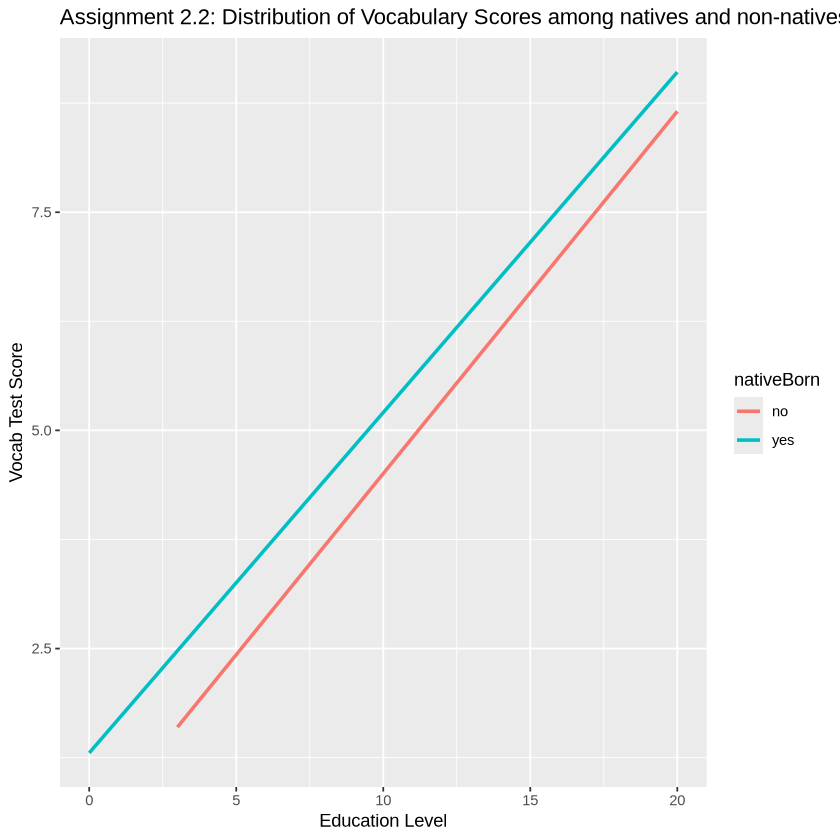

In [8]:
ggplot(data78, 
       aes(x = educ, 
           y = vocab, 
           color = nativeBorn)) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Assignment 2.2: Distribution of Vocabulary Scores among natives and non-natives by Education level",
    x = "Education Level",
    y = "Vocab Test Score"
  ) 

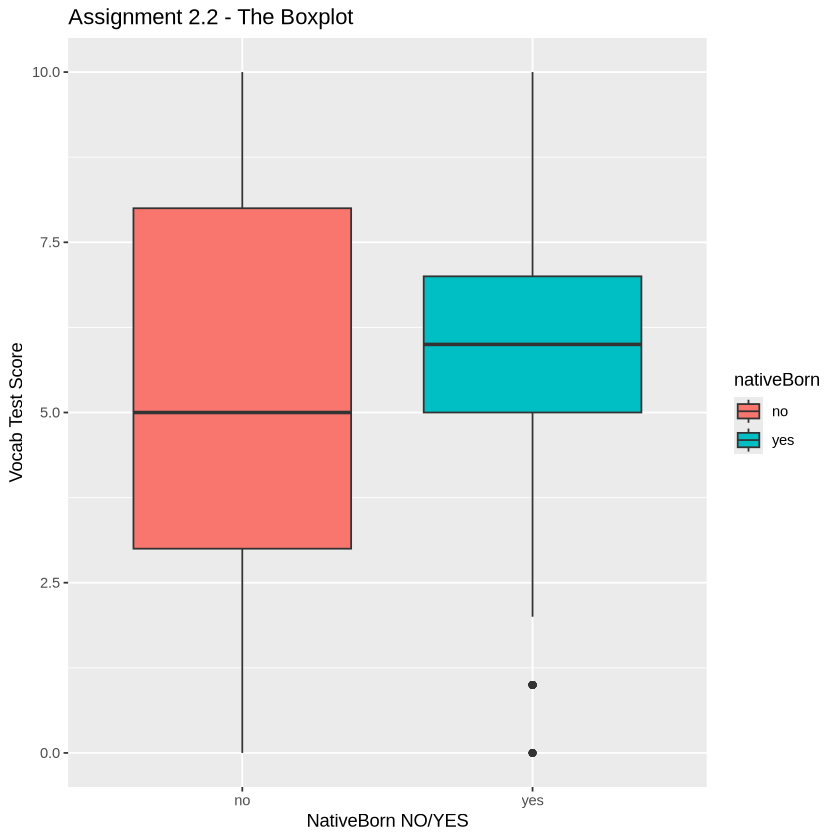

In [20]:
ggplot(data78,
       aes(x=nativeBorn,
           y=vocab,
          fill = nativeBorn)) +
       labs(title = "Assignment 2.2 - The Boxplot",
         x = "NativeBorn NO/YES",
         y = "Vocab Test Score") +
    geom_boxplot()

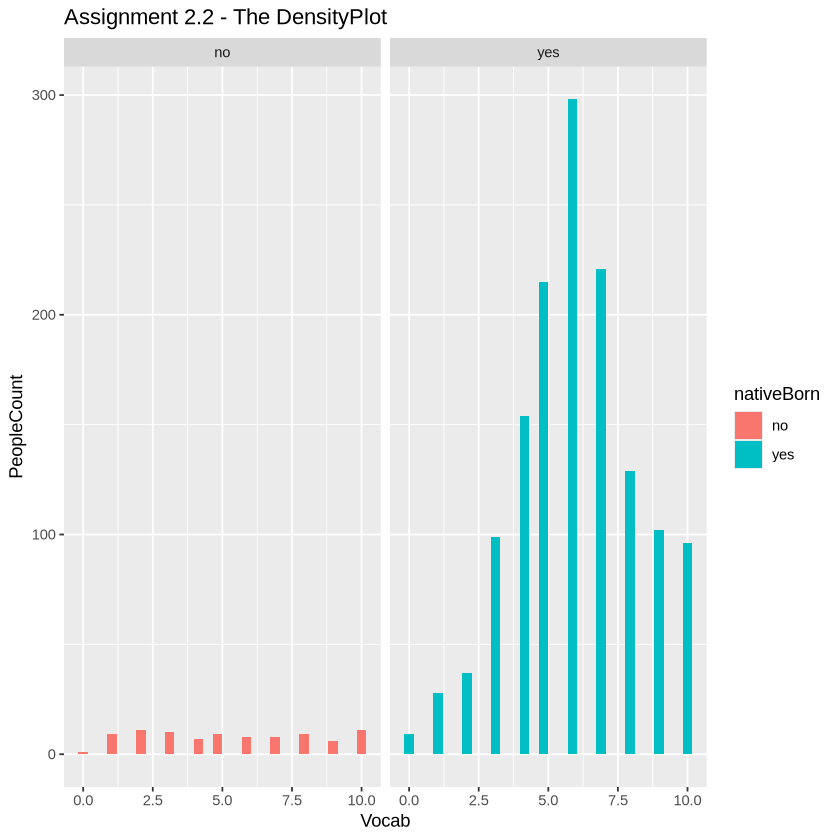

In [21]:
ggplot(data78, aes(x = vocab, fill = nativeBorn)) +
    geom_histogram(bins = 30) + 
    facet_wrap(~ nativeBorn) +  
    labs(title = "Assignment 2.2 - The DensityPlot", 
         x = "Vocab",
         y = "PeopleCount") 

In [16]:
NativeBorn_Vocab_MODEL <- lm(vocab ~ nativeBorn + educ, data78)
summary(lm(vocab ~ nativeBorn + educ, data78))


Call:
lm(formula = vocab ~ nativeBorn + educ, data = data78)

Residuals:
   Min     1Q Median     3Q    Max 
-7.162 -1.200  0.015  1.231  5.803 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.62803    0.27651   2.271  0.02327 *  
nativeBornyes  0.65032    0.20551   3.164  0.00159 ** 
educ           0.39222    0.01601  24.499  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.879 on 1474 degrees of freedom
Multiple R-squared:  0.2931,	Adjusted R-squared:  0.2921 
F-statistic: 305.6 on 2 and 1474 DF,  p-value: < 2.2e-16


ANSWER: 2. Whether a person is the native of an English-speaking country (‘nativeBorn’) could potentially have an impact on the size of their vocabulary. Visualize the relationship and add the predictor to the model. Briefly explain the results (with the outcome variable 'vocab') 

Short answer: Yes, being native to an English-speaking country affects vocabulary size.

Further explanation:  
Both "NativeBorn" status and education level affect vocabulary scores. On average, "NativeBorn" individuals score 0.65 points higher than "Non-NativeBorn" individuals, and each additional year of education increases the score by 0.39 points. This suggests that being "NativeBorn" is associated with a higher vocabulary score, and that more education generally corresponds to an increase in vocabulary score.

TThe boxplot shows that "NativeBorn" individuals tend to have higher and more consistent vocabulary scores, while "Non-NativeBorn" individuals scores are more widely distributed, as illustrated by the "Non-NativeBorn" group having a lower median vocabulary score compared to "NativeBorn" individuals. The histogram confirms this, with "Non-NativeBorn" scores more spread out and "NativeBorn" scores clustered around the center, while also highlighting that there are far fewer "Non-NativeBorn" individuals compared to "NativeBorn" individuals.


 3. Does a person’s level of education depend on whether they are a native of the country? 
Visualize the relationship. Do you think it makes sense to add the relationship as an interaction 
term? Try creating the model and briefly explain the results. Which model performs best? (with the outcome variable 'vocab')

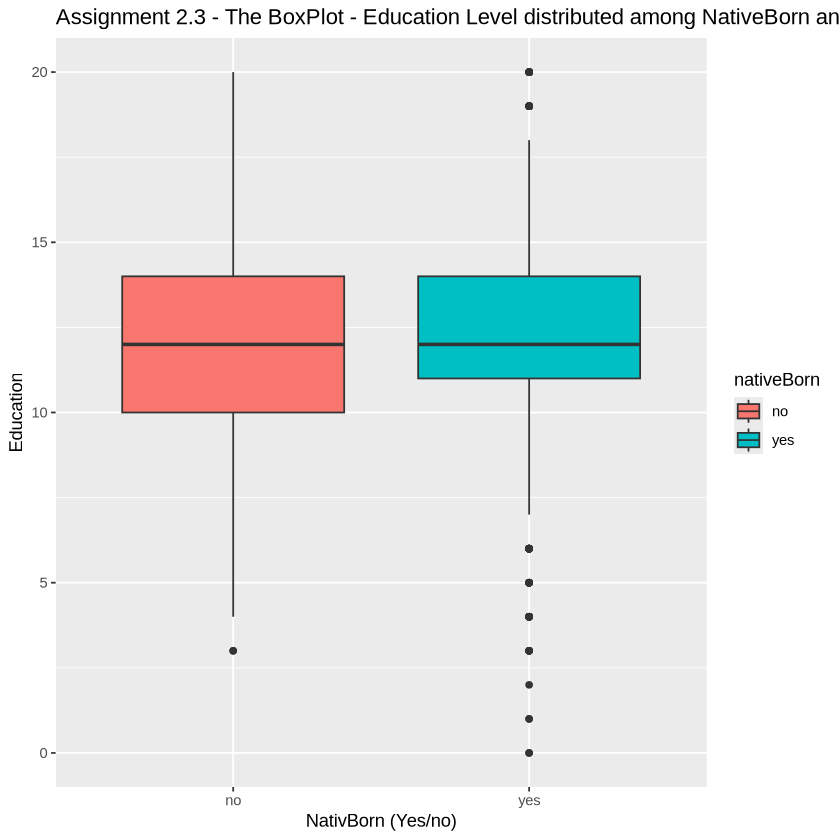

In [22]:
ggplot(data78, 
       aes(x = nativeBorn, 
           y = educ, 
           fill = nativeBorn)) +
    geom_boxplot() +
    labs(title = "Assignment 2.3 - The BoxPlot - Education Level distributed among NativeBorn and NonNativeBorn",
         x = "NativBorn (Yes/no)",
         y = "Education")

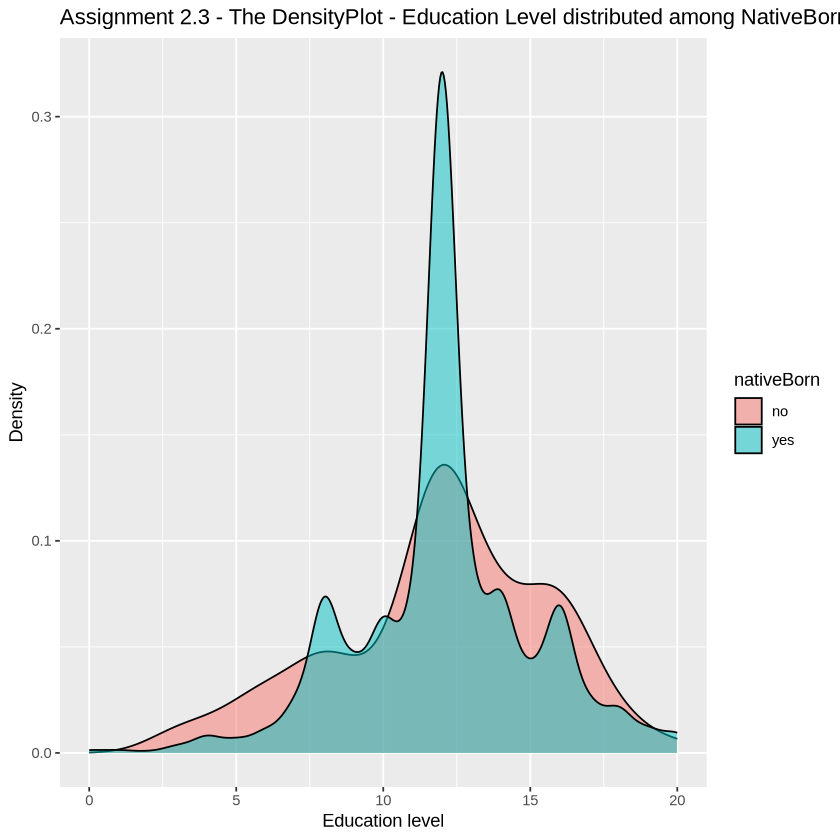

In [23]:
ggplot(data78,
       aes(x=educ,
           fill=nativeBorn)) +
       labs(title = "Assignment 2.3 - The DensityPlot - Education Level distributed among NativeBorn and NonNativeBorn",
         x = "Education level",
         y = "Density") + 
    geom_density(alpha=0.5)

In [24]:
m1 <- lm(vocab ~ educ, data = data78)
m2 <- lm(vocab ~ educ + nativeBorn, data78)
m3 <- lm(vocab ~ nativeBorn * educ, data78)

anova(m1, m2, m3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1475,5241.828,NA,NA,NA,NA
2,1474,5206.458,1,35.3707012,10.0082911,0.001590199
3,1473,5205.788,1,0.6695224,0.1894442,0.663443355


Answer: 3. Does a person’s level of education depend on whether they are a native of the country? Visualize the relationship. 

Short answer: Yes, a person’s level of education tends to depend on whether they are a native of the country. 

The boxplot above shows that the median education level (educ) is similar for "NativeBorn" and Non-"NativeBorn" individuals, suggesting that, on average, both groups achieve comparable levels of education. However, the spread of educ is wider for "Non-NativeBorn" indicating greater variability in education levels within this group.

The density plot further illustrates this variability, showing that education levels for "NativeBorn" individuals are more concentrated, while "Non-NativeBorn" individuals display a broader distribution across education levels. 

Answer: Do you think it makes sense to add the relationship as an interaction term? Try creating the model and briefly explain the results. Which model performs best? (with the outcome variable 'vocab')

Short answer: No. it does not make sense to add the interaction term. 

The second model, with a high Sum of Sq and F-statistic, best explains the relationship between predictor and outcome. The third model adds little improvement, showing the interaction term does not improve the model significantly.